# Calculate Nutrient concentrations below MLD for model forcing

In [1]:
require(dplyr, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

Loading required package: dplyr
Loading required package: cowplot
Loading required package: ggplot2


## read calculated MLD depth from csv

In [2]:
# read MLD depth file
mld_depth <- read.csv("DATA_processed/MLD_depth_calculated.csv")

# read Date column as POSIXct
mld_depth$Date <- as.POSIXct(mld_depth$Date, format="%Y-%m-%d")

X.1,X,CruiseID,Date,month,days,press,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld
1,12,93HG_001,1995-11-08,11,311,24.138,10.5,-64.67,23.982,23.984,26.711,36.663,26.717,NA,NA,NA,TRUE
2,638,93HG_002,1995-12-13,12,346,18.103,10.5,-64.67,24.712,24.684,25.330,36.906,25.334,NA,NA,NA,TRUE
3,1240,93HG_003,1996-01-12,1,11,28.162,10.5,-64.67,25.174,25.175,23.727,36.913,23.733,NA,NA,NA,TRUE
4,1813,93HG_004,1996-02-13,2,43,24.138,10.5,-64.67,25.348,25.350,23.206,36.943,23.211,NA,NA,NA,TRUE
5,2437,93HG_005,1996-03-13,3,72,14.080,10.5,-64.67,25.609,25.610,22.113,36.873,22.116,NA,NA,NA,TRUE
6,3741,93HG_006,1996-04-16,4,106,10.057,10.5,-64.67,25.578,25.579,22.343,36.893,22.345,NA,NA,NA,TRUE


## read Niskin Bottle data

In [3]:
# read CTDdat file
niskin <- read.csv("DATA_processed/Niskin_bottle_processed.csv")

# read Date column as POSIXct
niskin$Date <- as.POSIXct(niskin$Date, format="%Y-%m-%d")

# Niskin Data at MLD
first I have to merge the two data frames by Dates, and then extract the value that is below MLD

In [4]:
merge_niskin_mld <- merge(niskin, mld_depth, by="Date")

merge_niskin_mld$depthdiff <- merge_niskin_mld$press - merge_niskin_mld$Depth_real

names(merge_niskin_mld)
head(merge_niskin_mld$press)

[1] "Date"           "X.x"            "Cruise_ID"      "Leg"           
 [5] "lon.x"          "lat.x"          "Day"            "days.x"        
 [9] "Month"          "Year"           "Depth_target"   "Depth_real"    
[13] "O2_ml_L"        "O2_ml_L_Q"      "O2_umol_kg"     "O2_umol_kg_Q"  
[17] "SiOH4_Cumana"   "SiOH4_Cumana_Q" "PO4_Cumana"     "PO4_Cumana_Q"  
[21] "NO3_Cumana"     "NO3_Cumana_Q"   "NH4"            "NH4_Q"         
[25] "NO2"            "NO2_Q"          "NO3_NO2"        "NO3_NO2_Q"     
[29] "PO4"            "PO4_Q"          "SiOH4"          "SiOH4_Q"       
[33] "pH"             "pH_Q"           "Alkalinity"     "Alkalinity_Q"  
[37] "TCO2"           "TCO2_Q"         "fCO2"           "fCO2_Q"        
[41] "sal_bot"        "sal_bot_Q"      "sal_bot_corr"   "sal_bot_corr_Q"
[45] "sal_ctd"        "sal_ctd_Q"      "Temp"           "Temp_Q"        
[49] "Sigma_t"        "Sigma_t_Q"      "TPP"            "TPP_Q"         
[53] "PIP"            "PIP_Q"          "POC_ug_L"       "POC_ug_L_Q"    
[57] "PON_ug_L"       "PON_ug_L_Q"     "CtoN_part"      "CtoN_part_Q"   
[61] "POC_ug_kg"      "POC_ug_kg_Q"    "PON_ug_kg"      "PON_ug_kg_Q"   
[65] "DON_USF_uM"     "DON_USF_uM_Q"   "DOP_USF_uM"     "DOP_USF_uM_Q"  
[69] "DOC"            "DOC_Q"          "TOC"            "TOC_Q"         
[73] "PriPro"         "PriPro_Q"       "Chl"            "Chl_Q"         
[77] "Phaeo"          "Phaeo_Q"        "X.1"            "X.y"           
[81] "CruiseID"       "month"          "days.y"         "press"         
[85] "lat.y"          "lon.y"          "sigma_t"        "sigma_0"       
[89] "potemp"         "sal"            "temp"           "beam_att"      
[93] "beam_cp"        "fluor_chla"     "belowmld"       "depthdiff"

[1] 24.138 24.138 24.138 24.138 24.138 24.138

In [30]:
niskin_at_mld <- merge_niskin_mld %>%
  group_by(Cruise_ID) %>% # this groups it by the run number 
  filter(depthdiff < 0) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

Warning message:
“Removed 62 rows containing missing values (geom_point).”

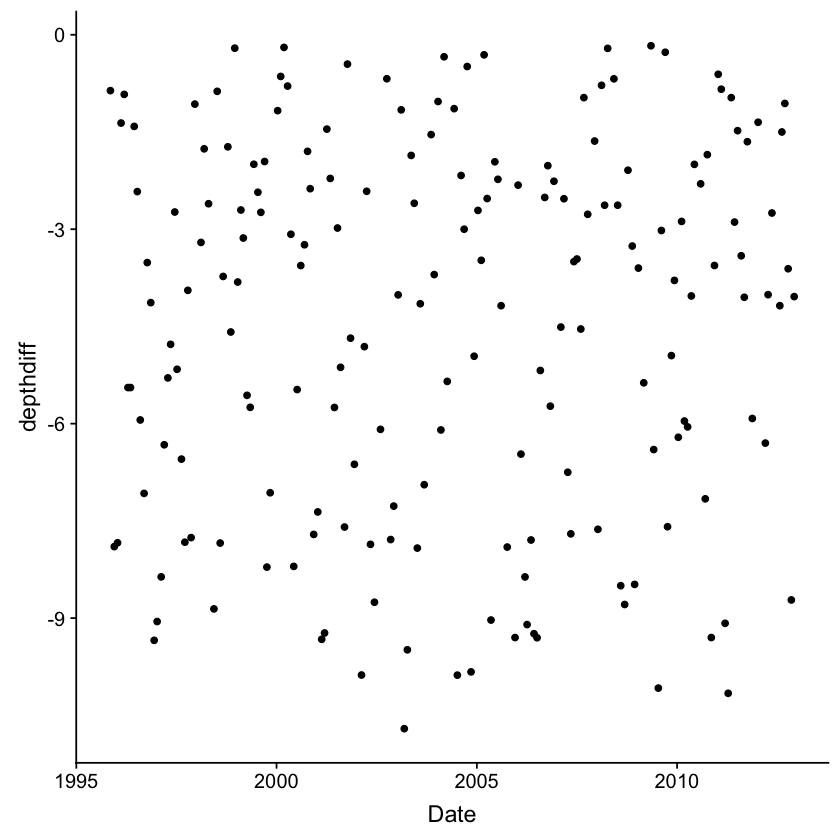

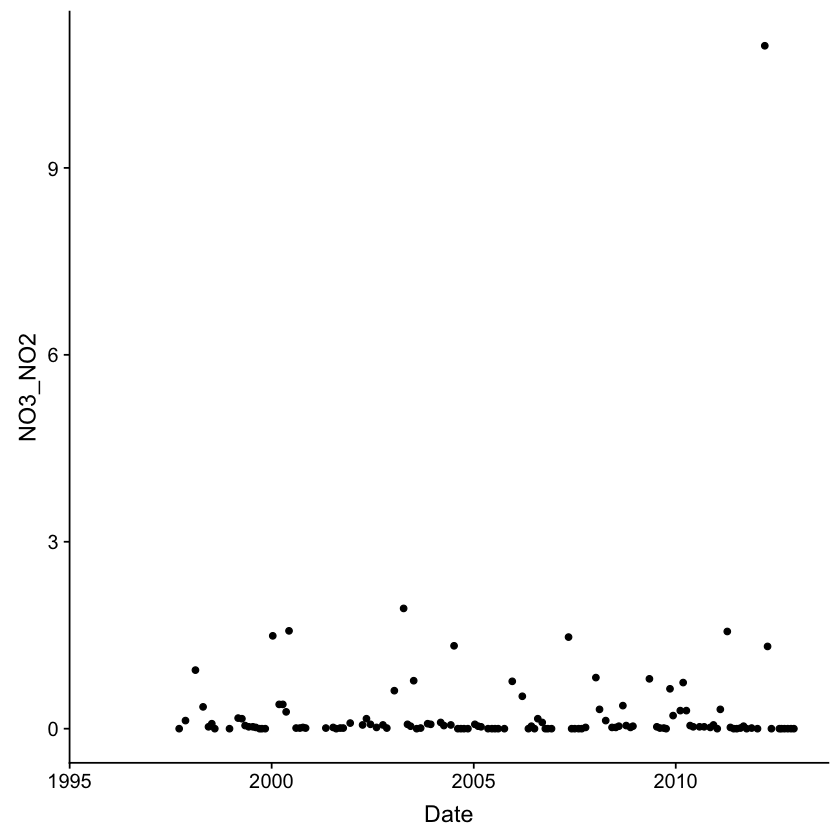

In [31]:
ggplot() + geom_point(data=niskin_at_mld_filtered, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=niskin_at_mld_filtered, aes(x=Date,y=NO3_NO2))

In [32]:
# Write CSV in R
write.csv(niskin_at_mld_filtered, file = "DATA_processed/Niskin_at_MLD_filtered.csv")

# Niskin above MLD

In [13]:
niskin_above_mld <- merge_niskin_mld %>%
  group_by(Cruise_ID) %>% # this groups it by the run number 
  filter(depthdiff > -3) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  #slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

niskin_above_mld

Date,X.x,Cruise_ID,Leg,lon.x,lat.x,Day,days.x,Month,Year,⋯,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld,depthdiff
1999-02-10,756,93HG_039,1,-64.67,10.5,10,40,2,1999,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,50.732
1999-02-10,757,93HG_039,1,-64.67,10.5,10,40,2,1999,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,45.600
2002-02-14,1442,93HG_075,1,-64.67,10.5,14,44,2,2002,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,44.522
2001-02-16,1213,93HG_063,1,-64.67,10.5,16,46,2,2001,⋯,25.834,25.836,21.069,36.785,21.078,0.575,NA,1.595,TRUE,43.480
2012-02-07,3562,93HG_188,1,-64.67,10.5,7,37,2,2012,⋯,25.652,25.654,21.724,36.787,21.732,0.109,0.473,0.240,TRUE,38.830
2002-02-14,1443,93HG_075,1,-64.67,10.5,14,44,2,2002,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,38.641
1999-02-10,758,93HG_039,1,-64.67,10.5,10,40,2,1999,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,38.410
2001-02-16,1214,93HG_063,1,-64.67,10.5,16,46,2,2001,⋯,25.834,25.836,21.069,36.785,21.078,0.575,NA,1.595,TRUE,37.642
1999-12-07,950,93HG_049,1,-64.67,10.5,7,340,12,1999,⋯,23.171,23.174,28.245,36.144,28.254,0.450,NA,0.176,TRUE,34.622
2002-01-10,1423,93HG_074,1,-64.67,10.5,10,9,1,2002,⋯,25.062,25.064,24.055,36.898,24.063,0.532,NA,0.860,TRUE,34.316


In [14]:
# Write CSV in R
write.csv(niskin_above_mld, file = "DATA_processed/Niskin_above_MLD.csv")

# Abundances of phytoplankton above MLD

In [36]:
phyto_filt <- read.csv("DATA_processed/PhytoAbund_filtered.csv")
phyto_filt$Date <- as.POSIXct(phyto_filt$date, format="%Y-%m-%d")

In [37]:
merge_phyto_mld <- merge(phyto_filt, mld_depth, by="Date")

merge_phyto_mld$depthdiff <- merge_phyto_mld$press - merge_phyto_mld$depth

str(merge_phyto_mld)
head(merge_phyto_mld$press)

'data.frame':	570560 obs. of  31 variables:
 $ Date      : POSIXct, format: "1995-11-08" "1995-11-08" ...
 $ X.1.x     : int  1 2 3 4 5 6 7 8 10 11 ...
 $ X.x       : int  1 2 3 4 5 6 7 8 10 11 ...
 $ CruiseID.x: Factor w/ 170 levels "93HG_001","93HG_002",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ lon.x     : num  -64.7 -64.7 -64.7 -64.7 -64.7 ...
 $ lat.x     : num  10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 10.5 ...
 $ date      : Factor w/ 170 levels "1995-11-08","1995-12-13",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month.x   : int  11 11 11 11 11 11 11 11 11 11 ...
 $ year      : int  1995 1995 1995 1995 1995 1995 1995 1995 1995 1995 ...
 $ depth     : int  1 7 15 25 35 55 75 100 1 7 ...
 $ taxon     : Factor w/ 960 levels "Acanthoica_cuatrospina",..: 21 21 21 21 21 21 21 21 32 32 ...
 $ group     : Factor w/ 7 levels "COCCOLITHOPHORIDS",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ abundance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.1.y     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ X.y       : int  12 12 12 12 12 12 12 12 12 12 

[1] 24.138 24.138 24.138 24.138 24.138 24.138

In [10]:
phyto_above_mld <- merge_phyto_mld %>%
  group_by(CruiseID.x) %>% # this groups it by the run number 
  filter(depthdiff > -3) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  #slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

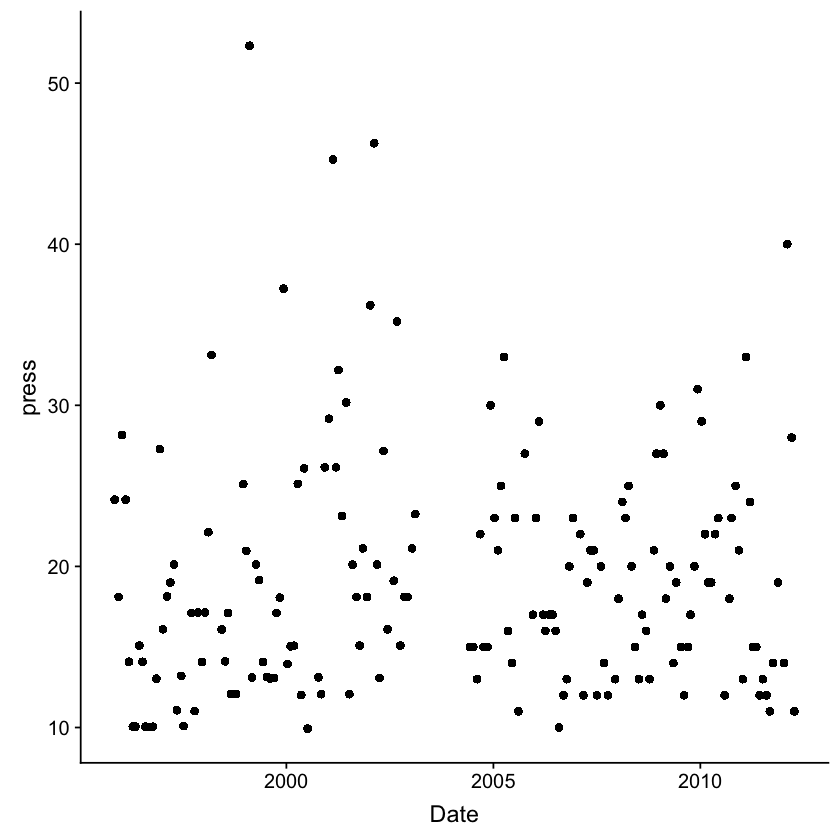

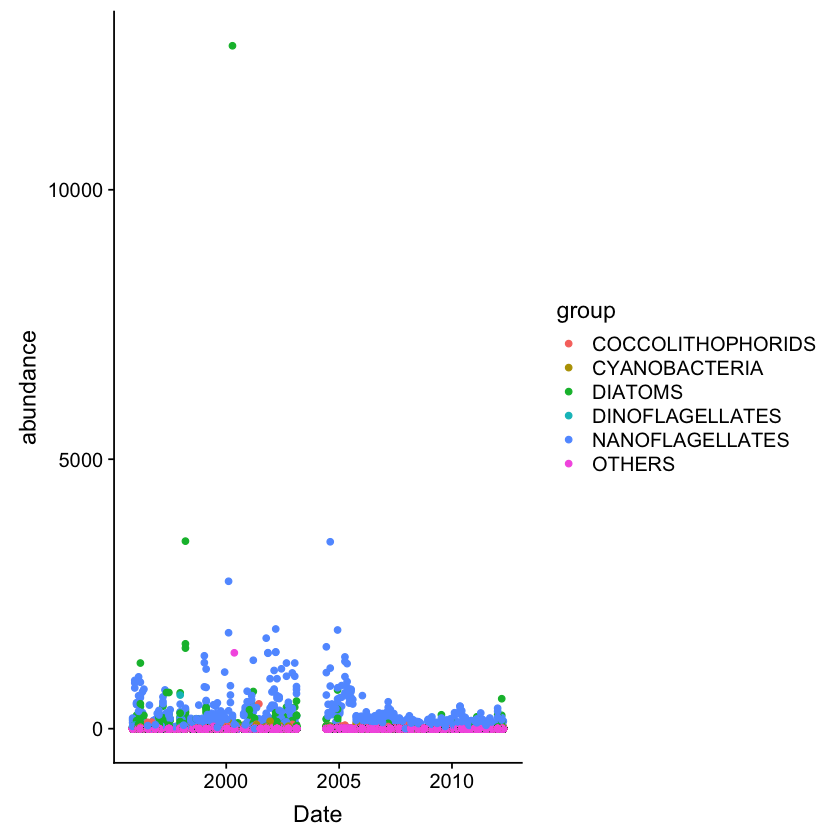

In [11]:
ggplot() + geom_point(data=phyto_above_mld, aes(x=Date,y=press))
ggplot() + geom_point(data=phyto_above_mld[!phyto_above_mld$group=="TOTAL",], aes(x=Date,y=abundance,col=group))

In [12]:
# Write CSV in R
write.csv(phyto_above_mld, file = "DATA_processed/Phyto_above_MLD.csv")

## PHYTO BELOW MLD

In [38]:
phyto_below_mld <- merge_phyto_mld %>%
  group_by(CruiseID.x) %>% # this groups it by the run number 
  filter(depthdiff < -3) %>% # only keep values below MLD
  arrange(desc(depthdiff))%>% # arrange with smallest depth difference at the top
  #slice(1) %>% # takes the topmost value (i.e. closest below MLD)
  ungroup() #removes grouping

In [39]:
# Write CSV in R
write.csv(phyto_below_mld, file = "DATA_processed/Phyto_below_MLD.csv")